<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/bell4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Improved Web Scraping at WeCloudData
Farius Tjioesman - 21 October 2020

Following week 0 contribution together with Lexie and Manny on customer journey I added Panda, Selenium discussion and compared week 0 code with improved week 3 code.

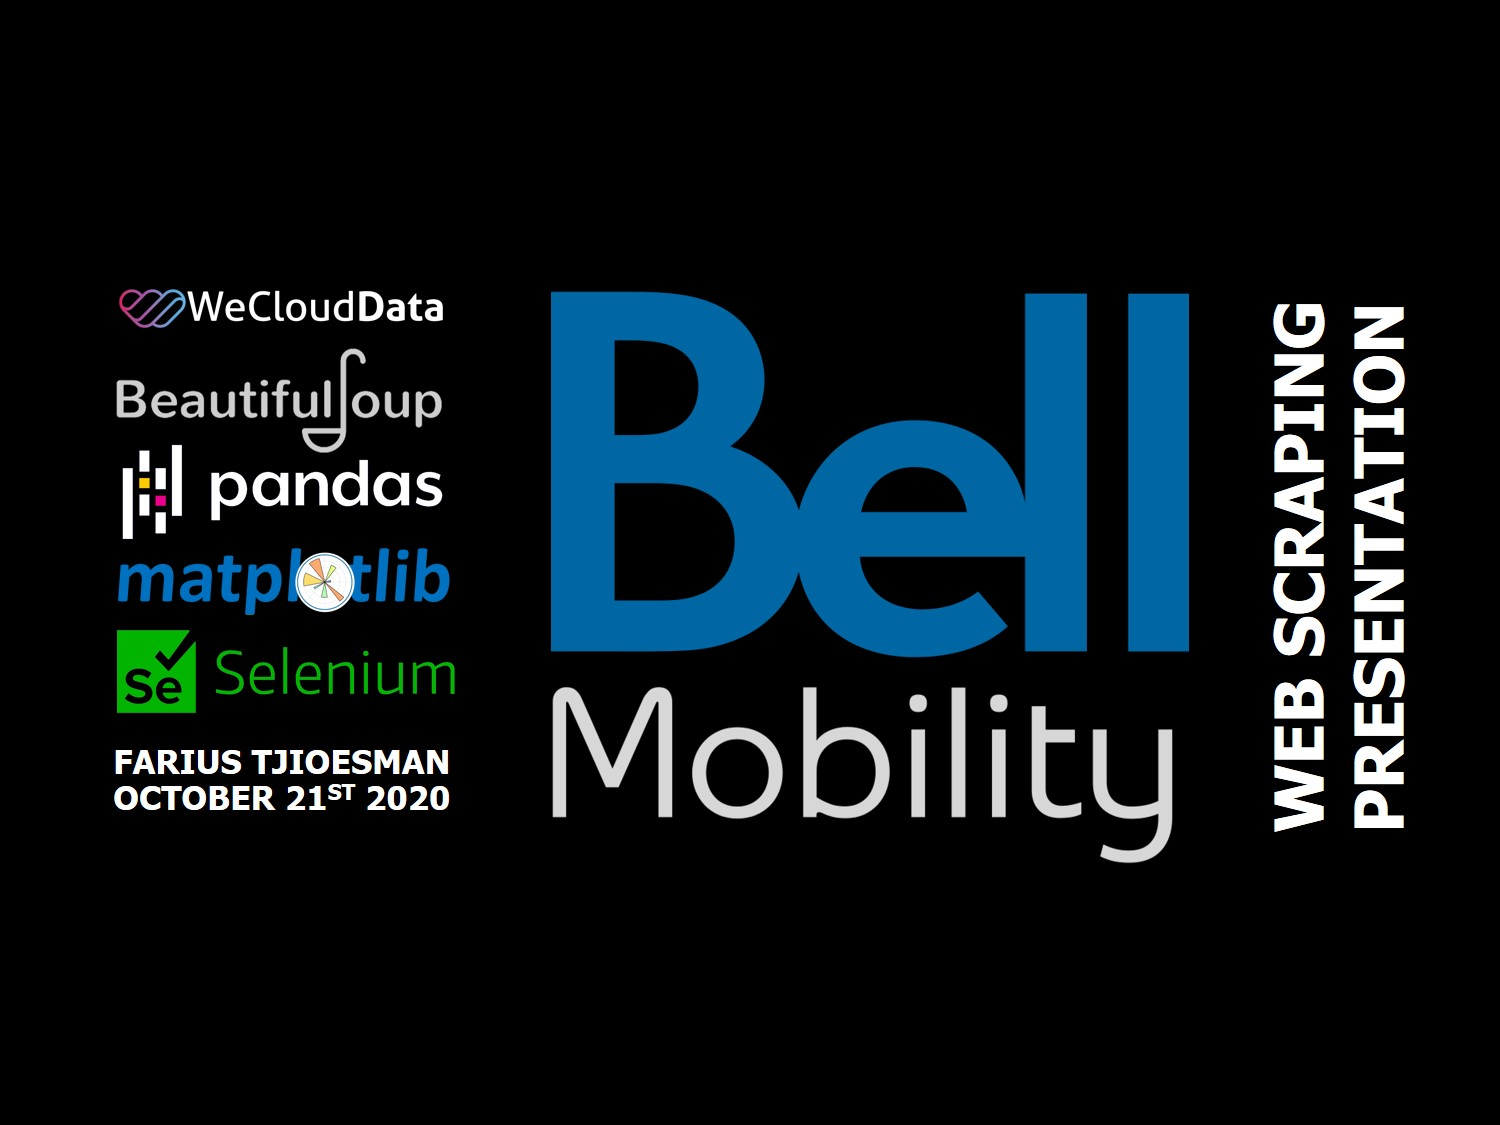

The purpose behind this presentation is of course to share my python learning experience differently by grabbing phone images, model names and prices from Bell Mobility site.

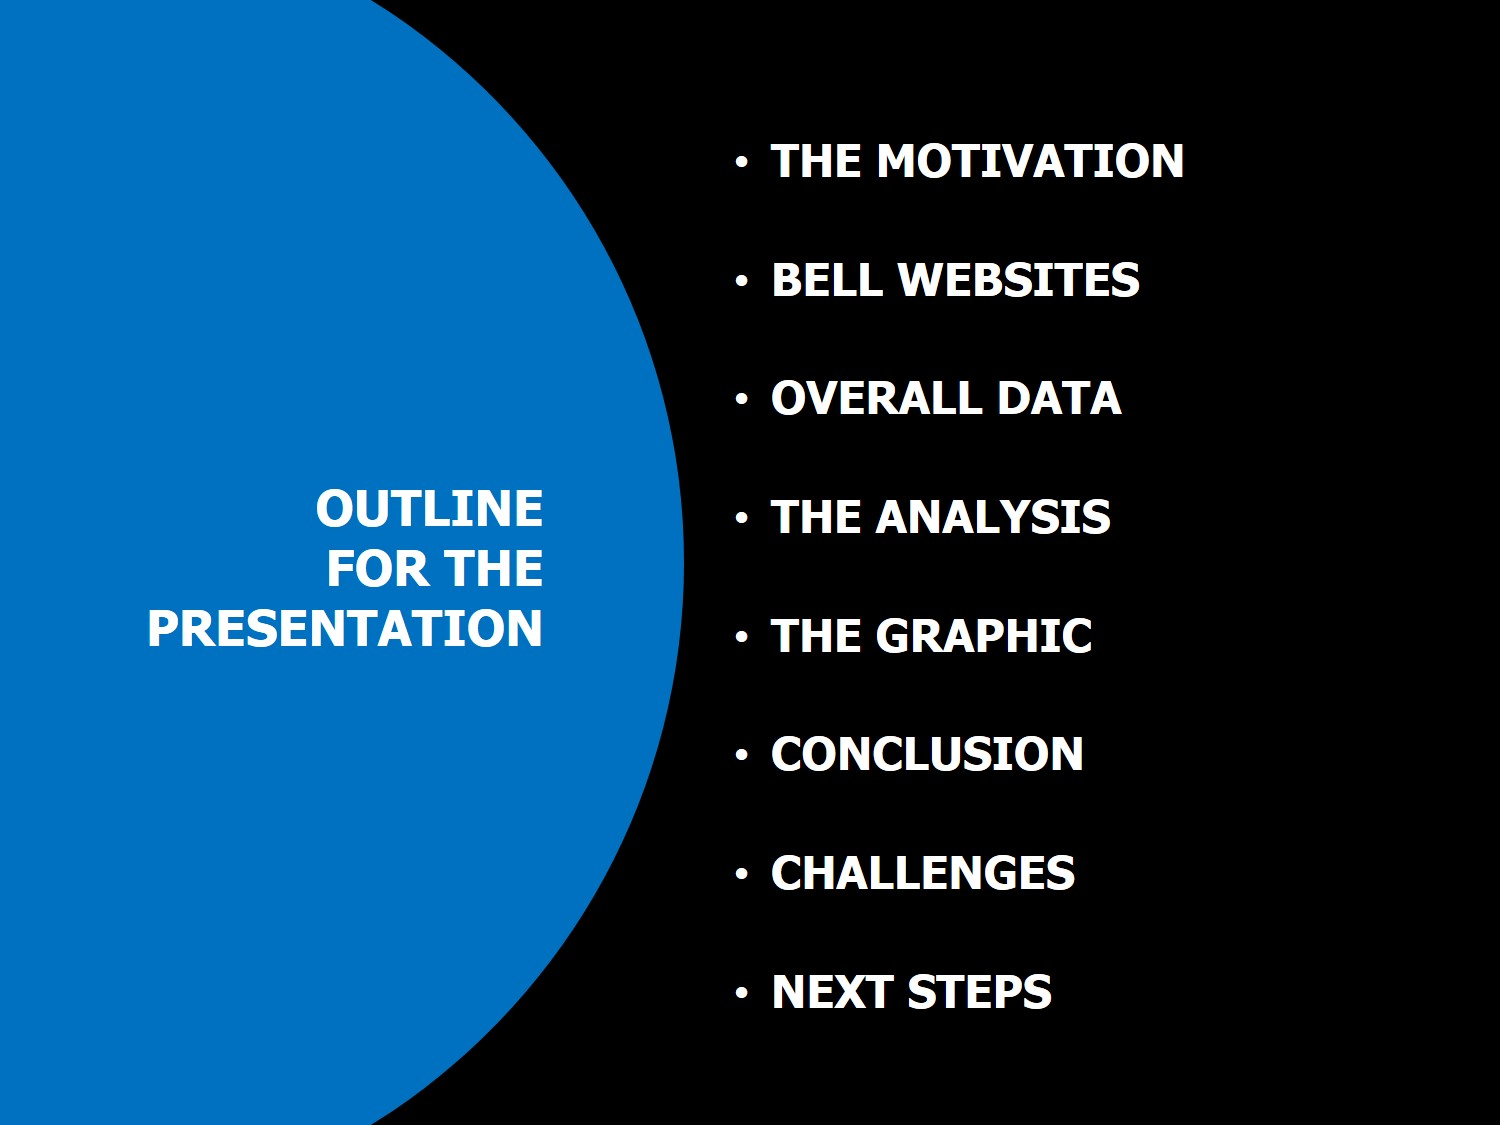

Applying Vinny, Robert and Parry notes on Beautiful Soup, Selenium, dictionary comprehension, TQDM, Strip/Split, Panda, Lambda, Matplotlib, Nested Query from cloud is a motivation.

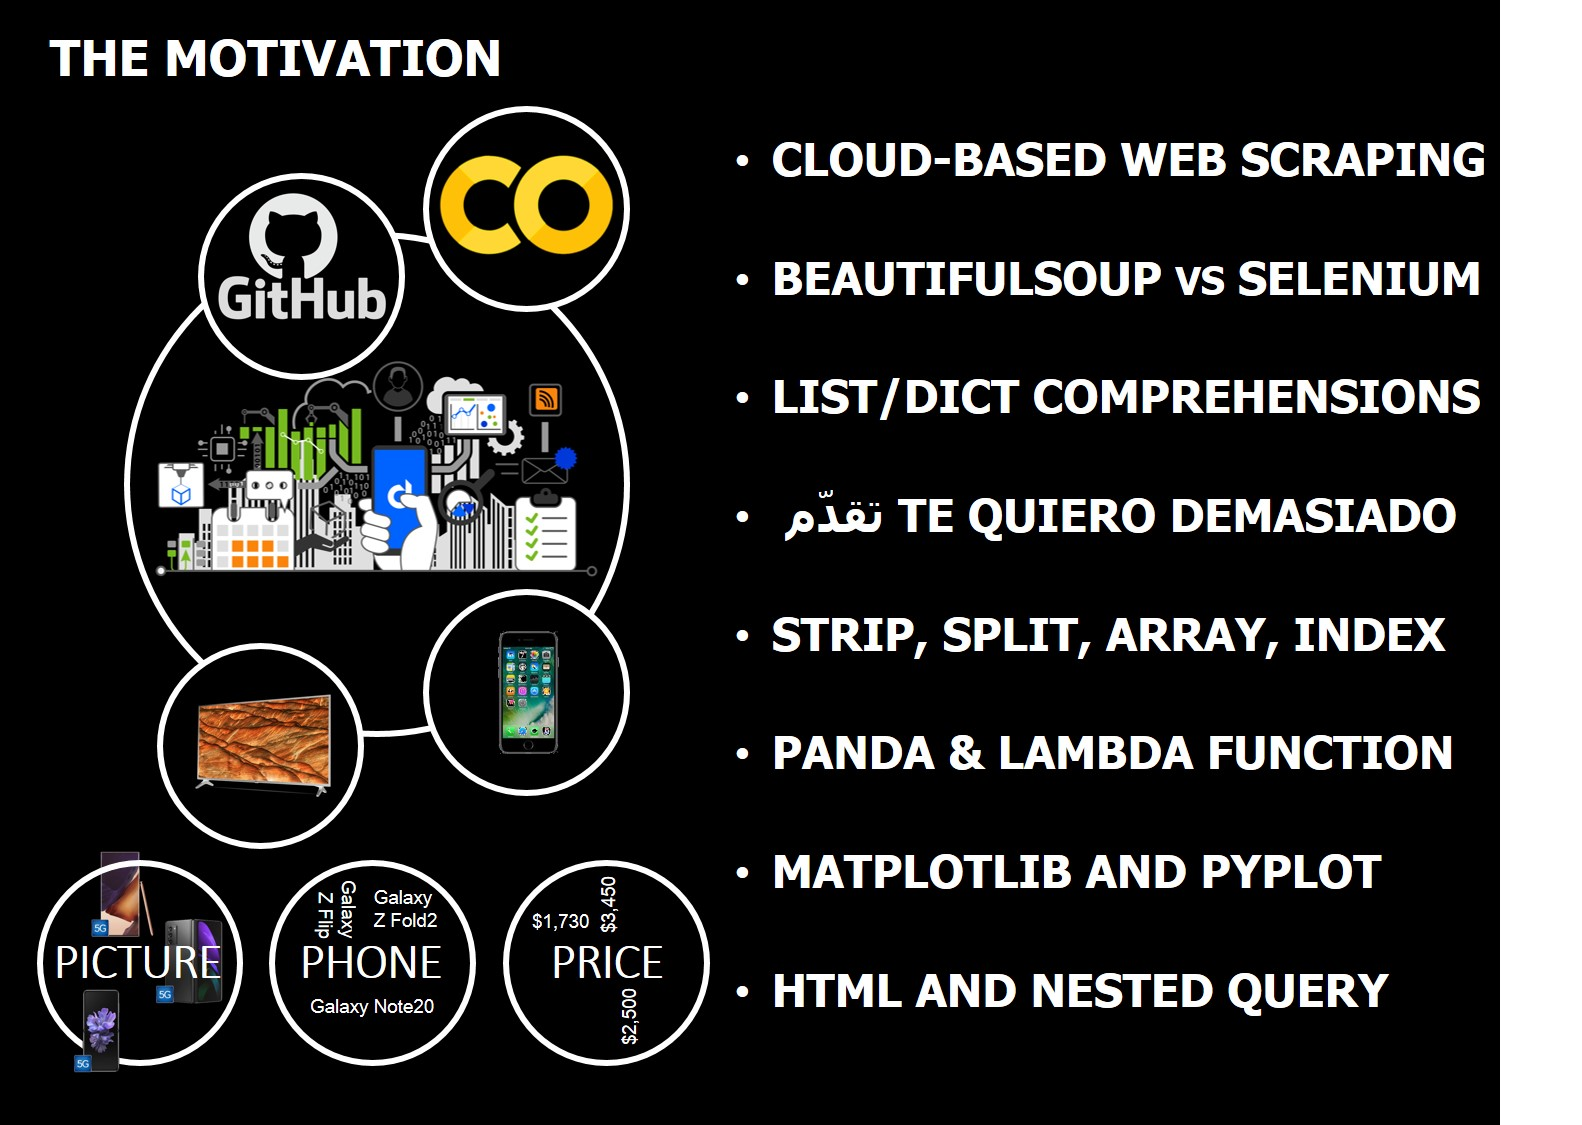

Bell Mobility website is updated weekly based on latest technology available, grouped by brands and models. There are usually 40-50s models available, about 10% are prepaid.

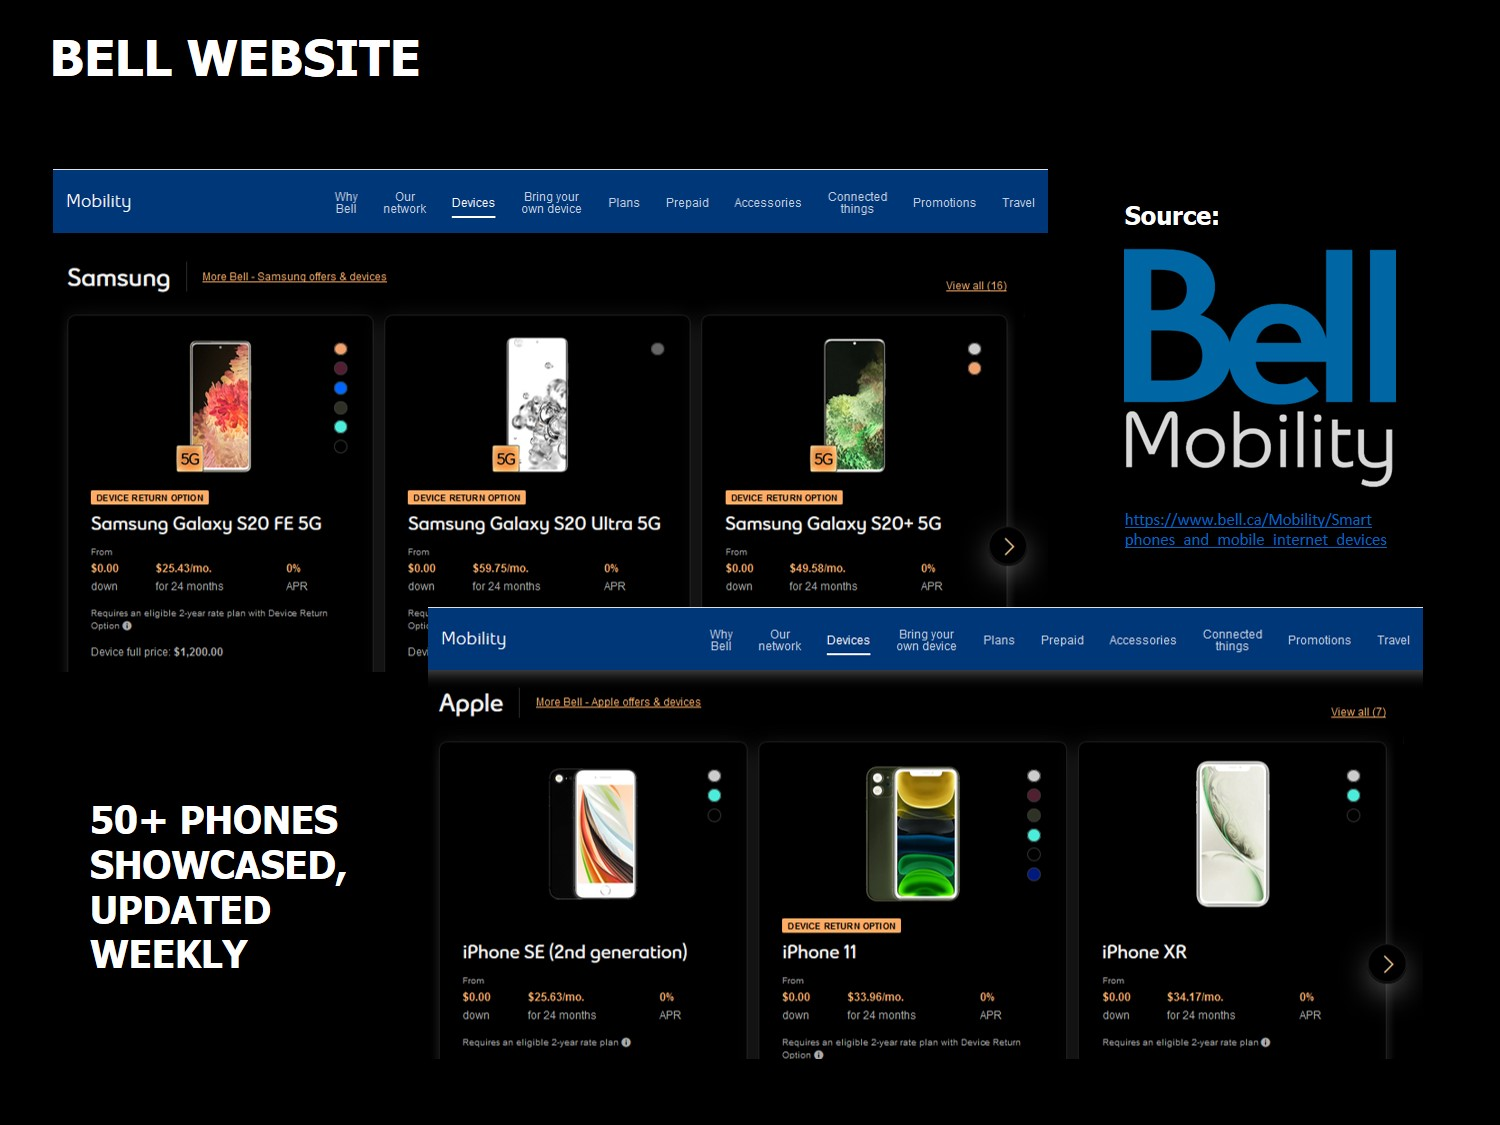

All phones features represent half of the file. On dl-img-full-prices class we find MSRP. From dl-img-tile we find both png links, model names. At the end phone, picture, price are consecutively displayed.

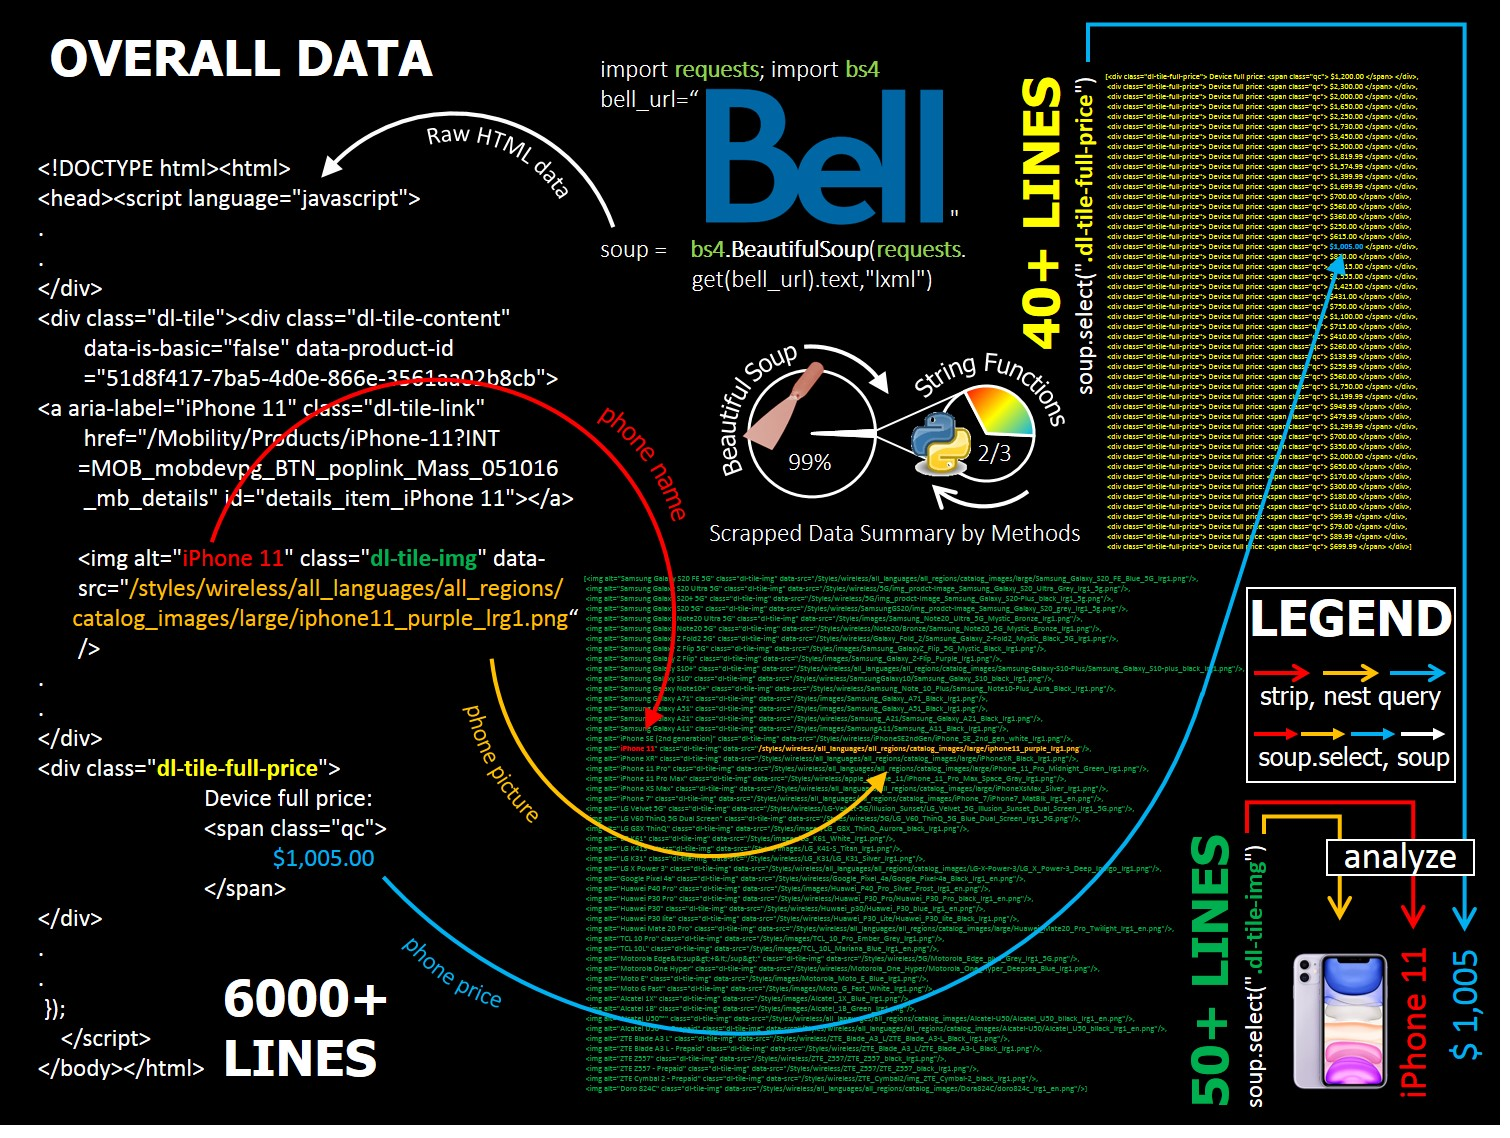

The pair of phone names and png hyperlinks are stored to dgdict dictionary, sorted out prepaid ones. Phone prices are stored into Panda Data Frame instead of traditional list with loop.

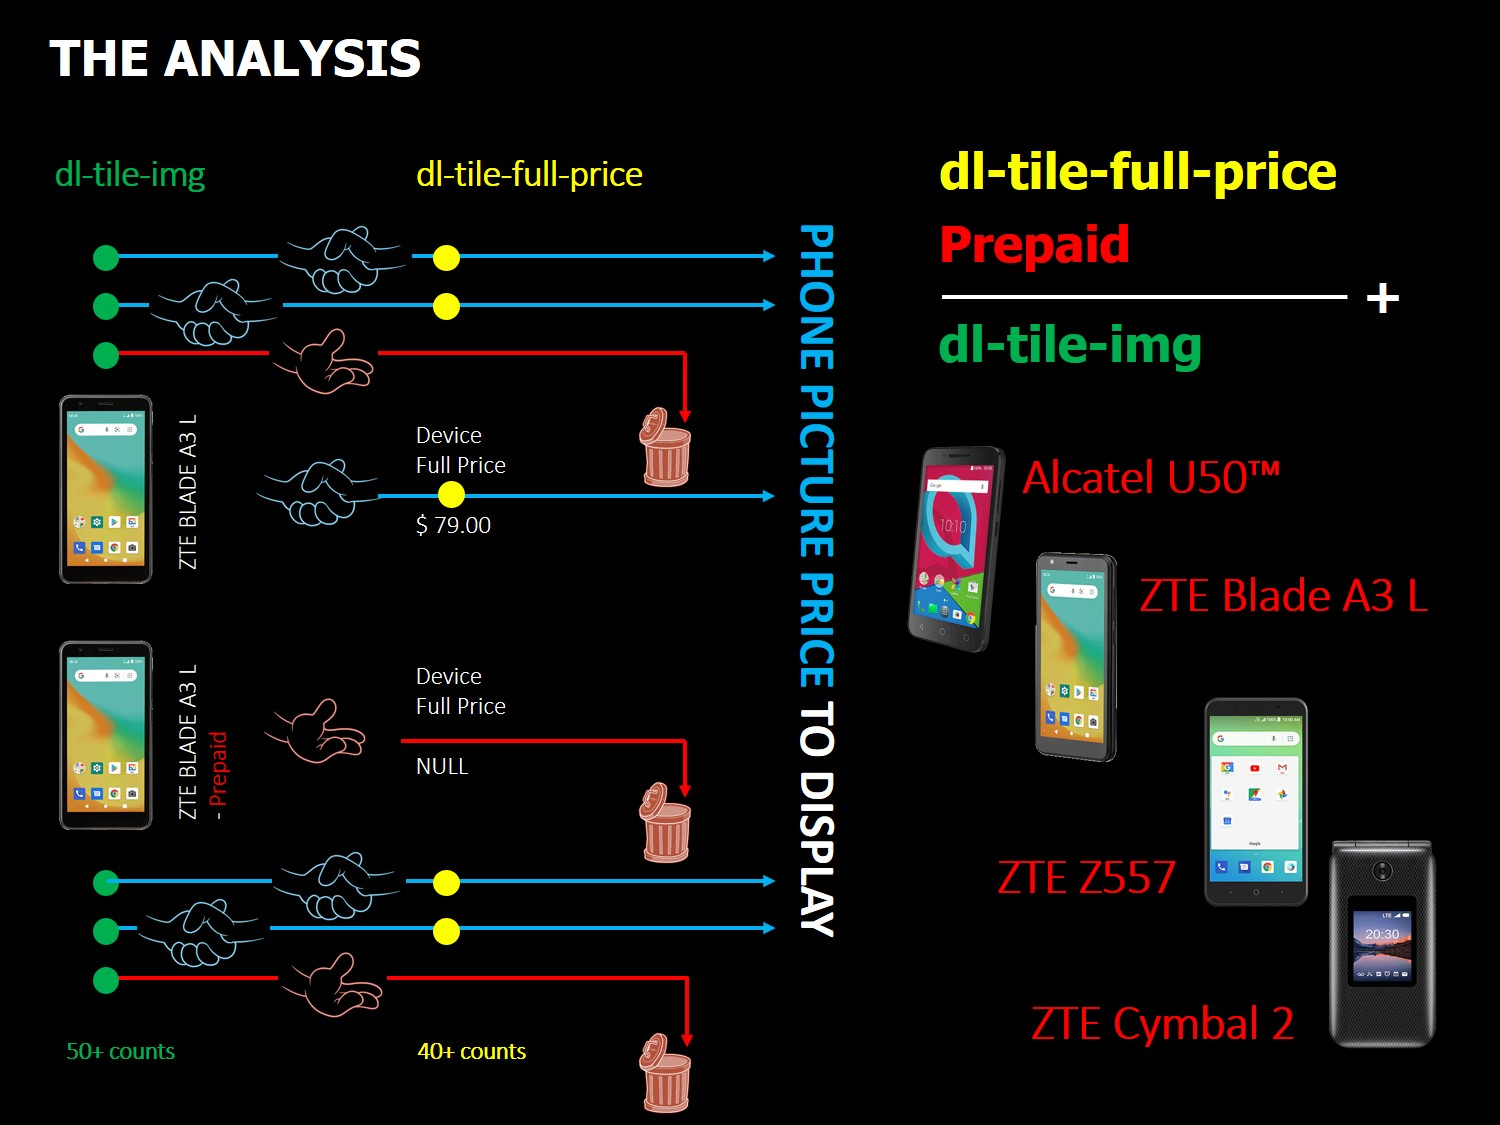

Applying pyplot the png links from glist can be displayed within the frame. By default the axis is on. Using browser this code can be run anywhere (TV, iPad), no need python installation. 

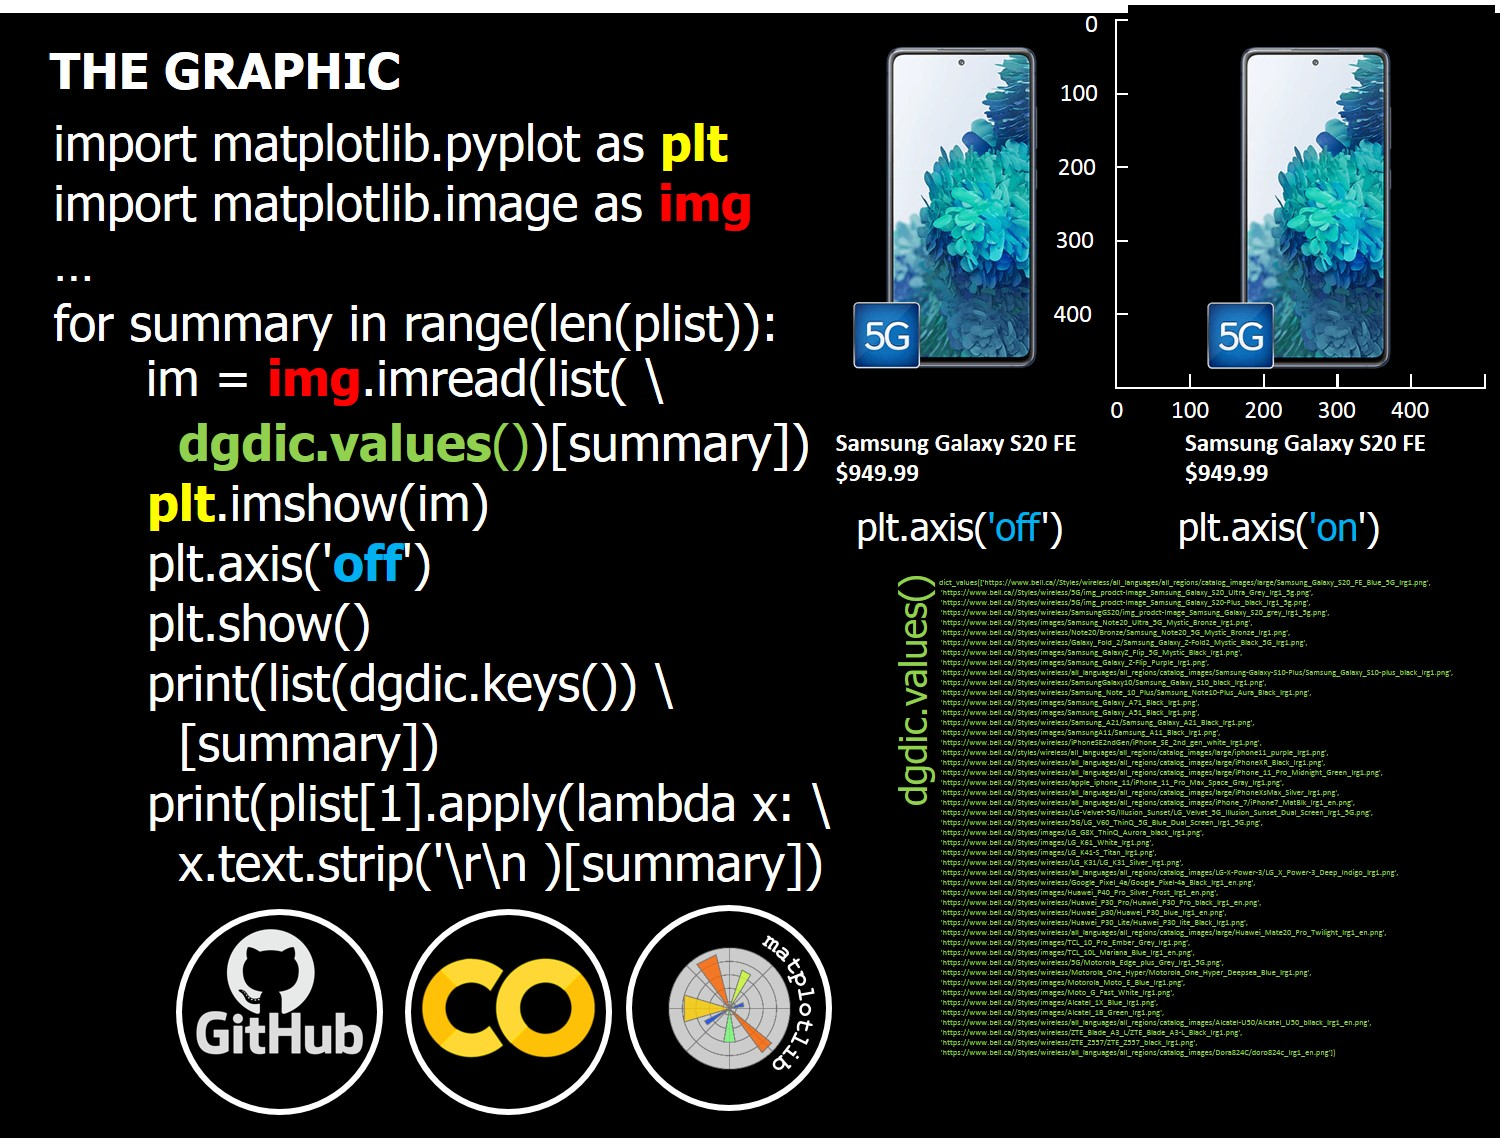

From 6000+ lines from Bell HTML, 3000 lines are related to showcased phones. Three features are taken from each of 40-50 phones to display using python functions as shown in blue fonts.

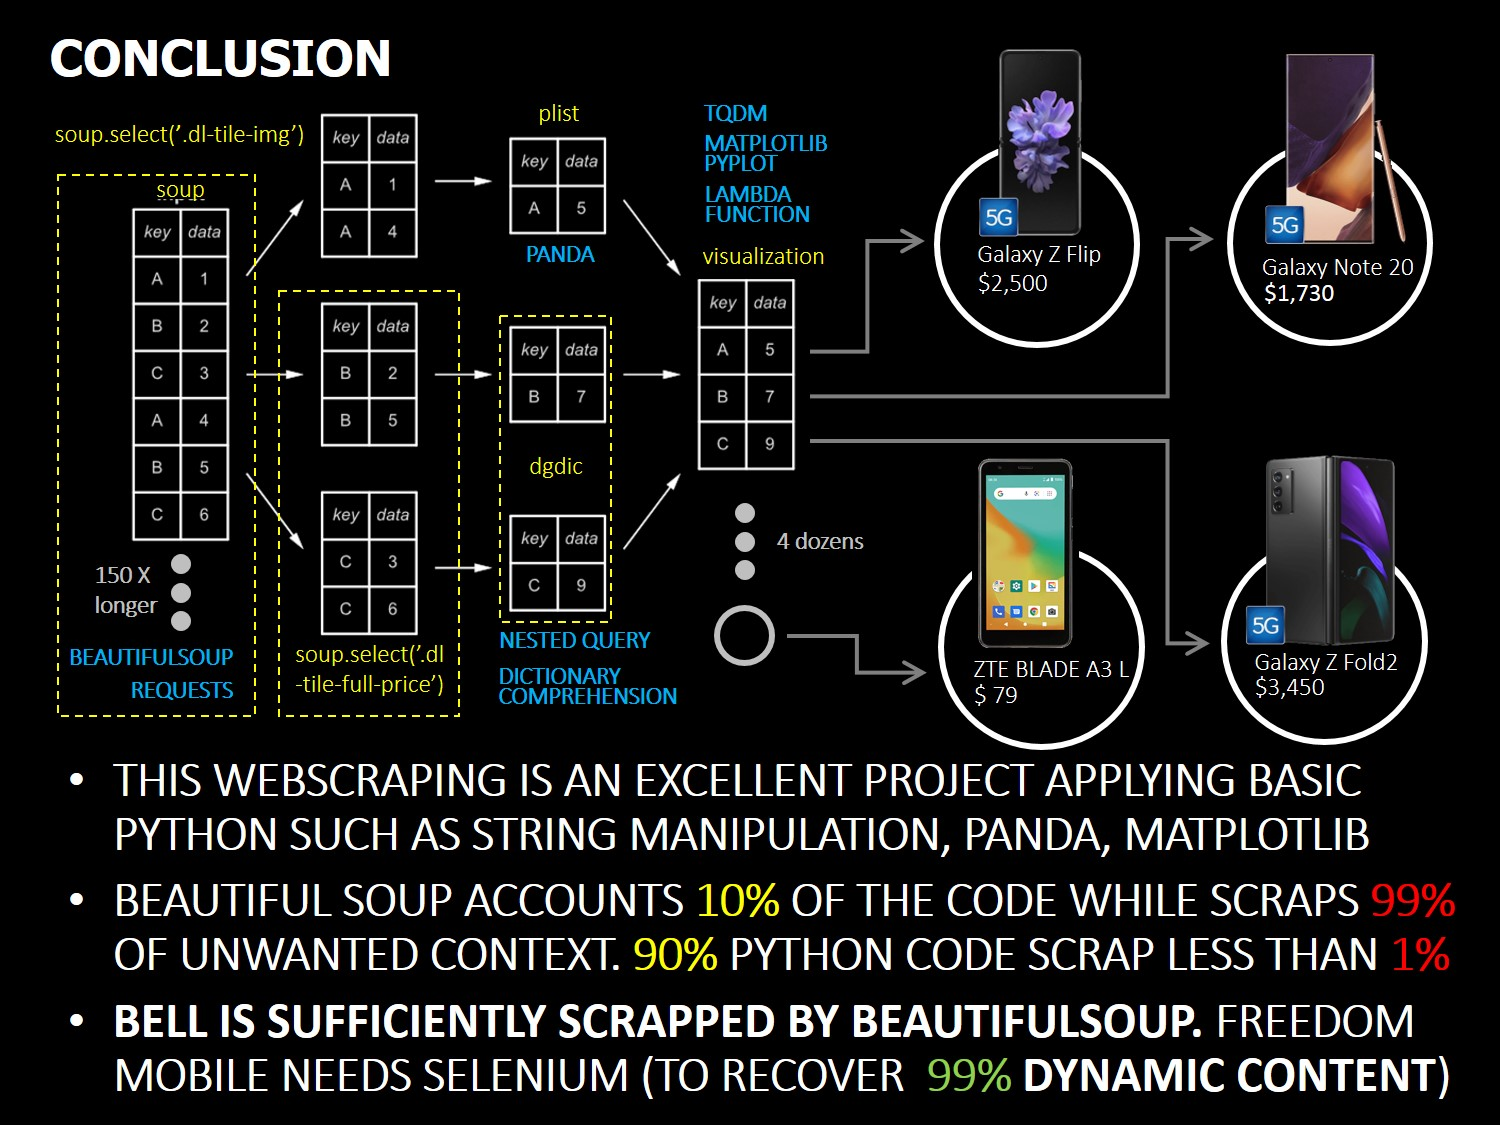

This exercise is more than technical but also an education challenge to convey python basic in easiest way. The challenge remain high to understand array, index when stripping. 

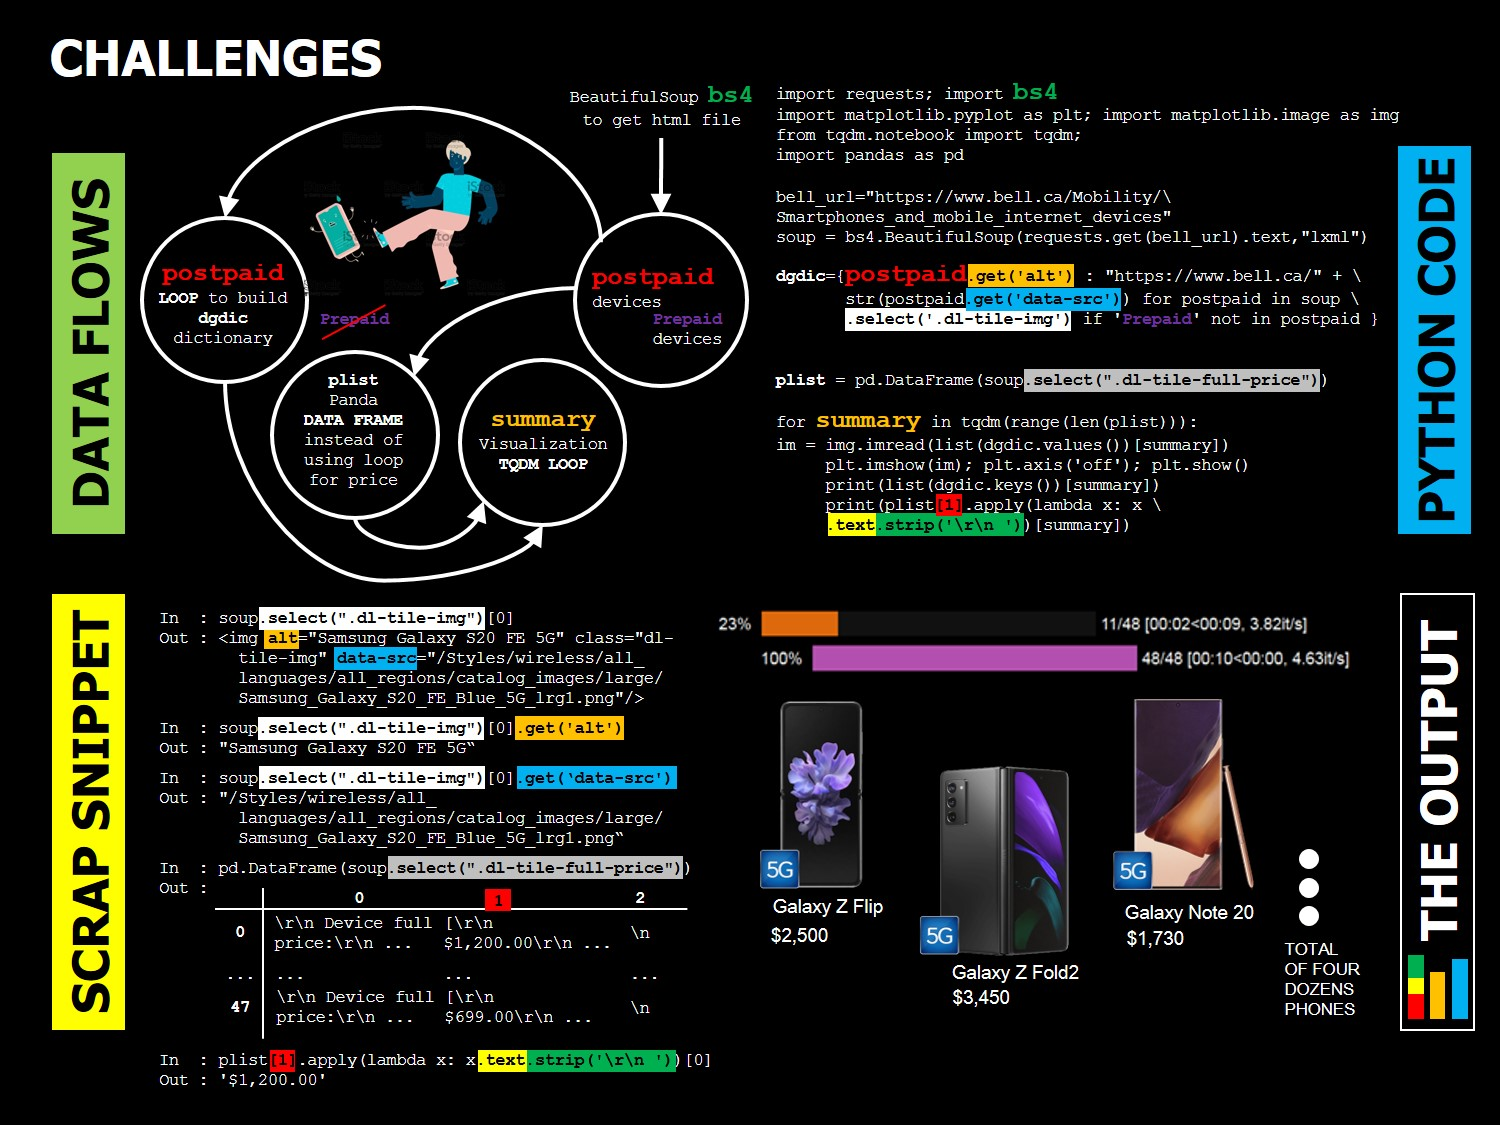

2 things for next steps. First is improving the code, see week 0 & week 3 example where I added features learnt lately. Second, using Selenium for Freedom, I finally got the full data.

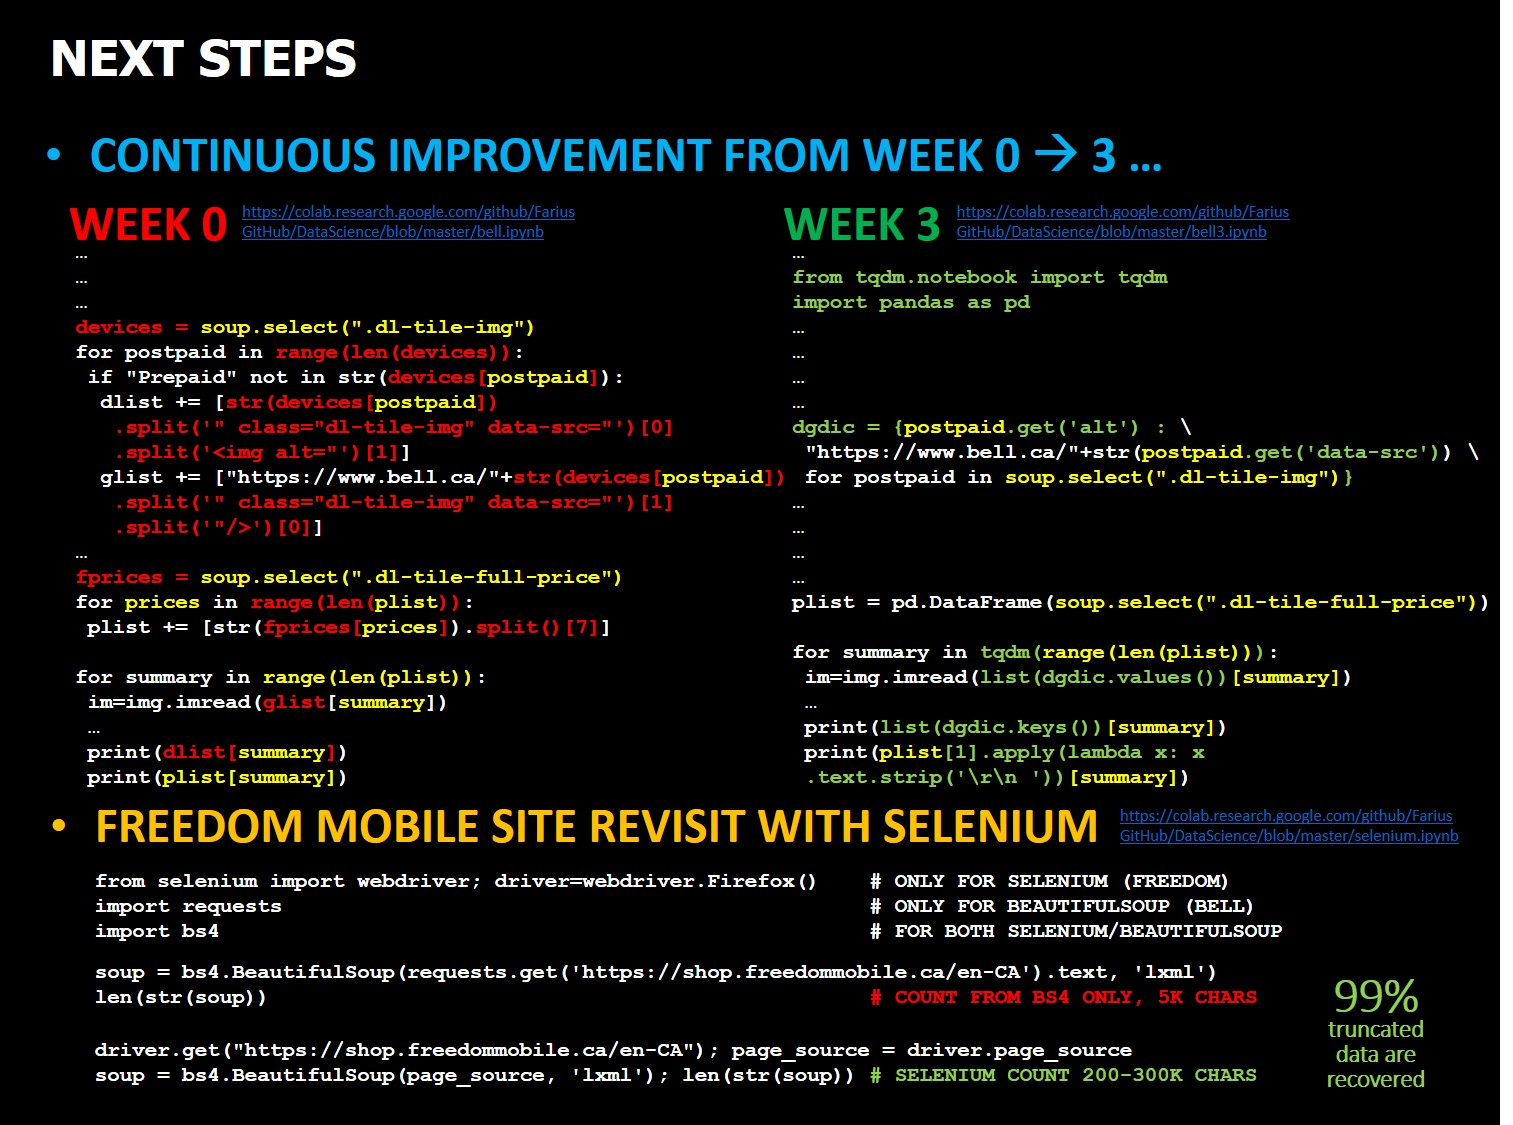

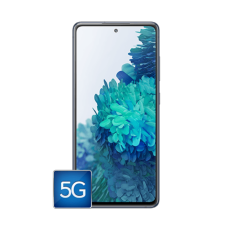

Samsung Galaxy S20 FE 5G
$1,200.00


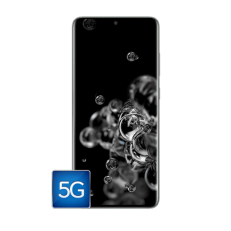

Samsung Galaxy S20 Ultra 5G
$2,300.00


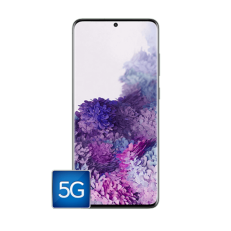

Samsung Galaxy S20+ 5G
$2,000.00


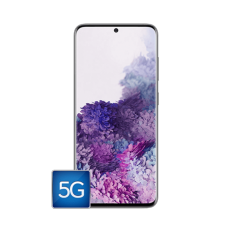

Samsung Galaxy S20 5G
$1,650.00


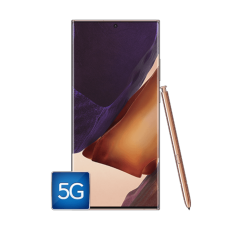

Samsung Galaxy Note20 Ultra 5G
$2,250.00


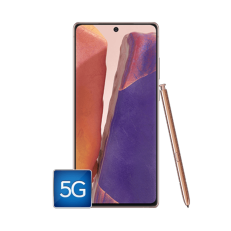

Samsung Galaxy Note20 5G
$1,730.00


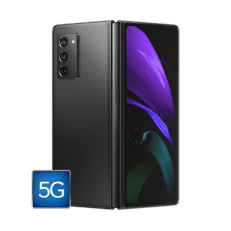

Samsung Galaxy Z Fold2 5G
$3,450.00


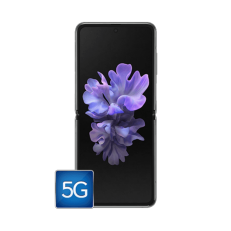

Samsung Galaxy Z Flip 5G
$2,500.00


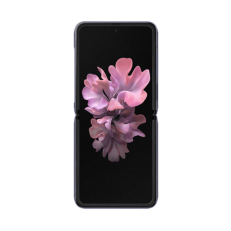

Samsung Galaxy Z Flip
$1,819.99


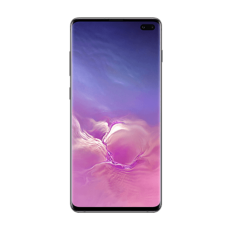

Samsung Galaxy S10+
$1,574.99


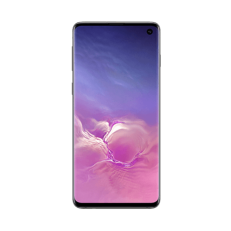

Samsung Galaxy S10
$1,399.99


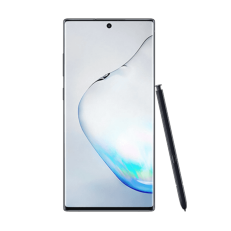

Samsung Galaxy Note10+
$1,699.99


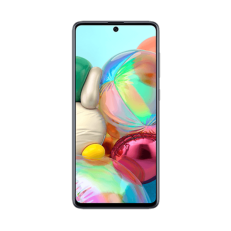

Samsung Galaxy A71
$700.00


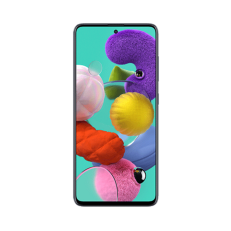

Samsung Galaxy A51
$560.00


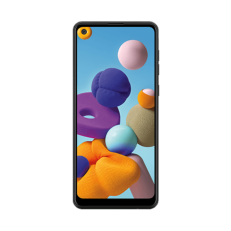

Samsung Galaxy A21
$360.00


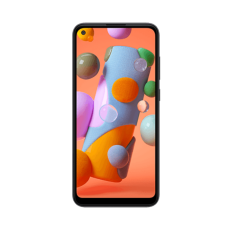

Samsung Galaxy A11
$250.00


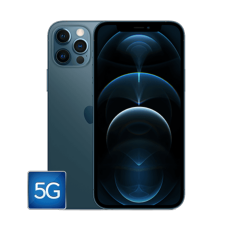

iPhone 12 Pro
$1,440.00


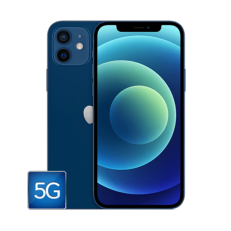

iPhone 12
$1,164.00


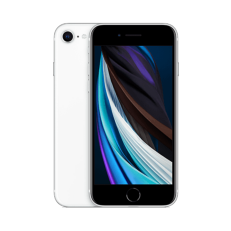

iPhone SE (2nd generation)
$615.00


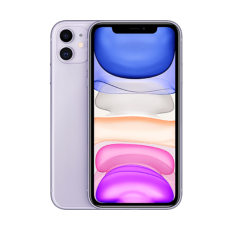

iPhone 11
$875.00


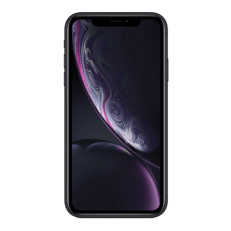

iPhone XR
$720.00


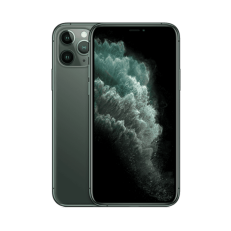

iPhone 11 Pro
$1,100.00


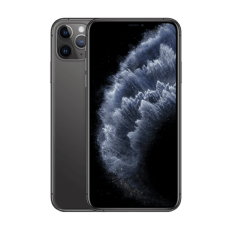

iPhone 11 Pro Max
$1,247.00


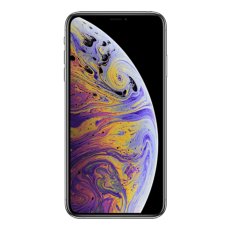

iPhone XS Max
$1,425.00


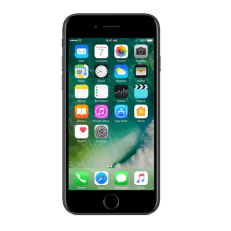

iPhone 7
$431.00


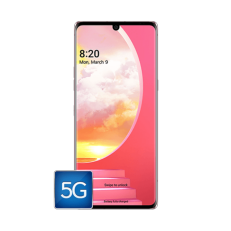

LG Velvet 5G
$750.00


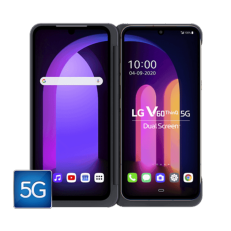

LG V60 ThinQ 5G Dual Screen
$1,100.00


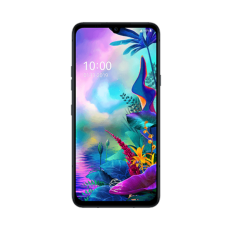

LG G8X ThinQ
$715.00


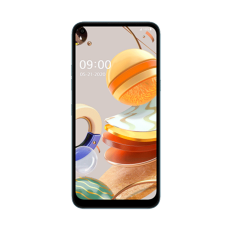

LG K61
$410.00


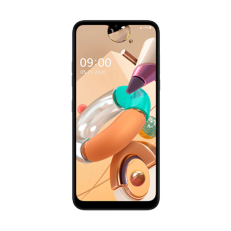

LG K41S
$260.00


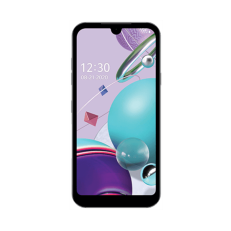

LG K31
$139.99


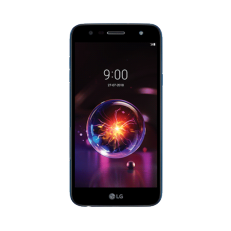

LG X Power 3
$259.99


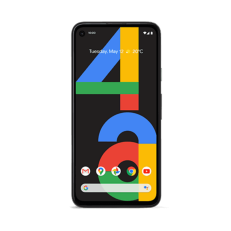

Google Pixel 4a
$560.00


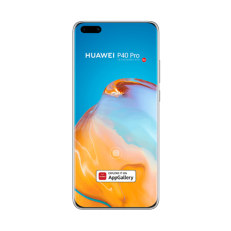

Huawei P40 Pro
$1,750.00


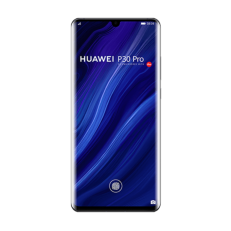

Huawei P30 Pro
$1,199.99


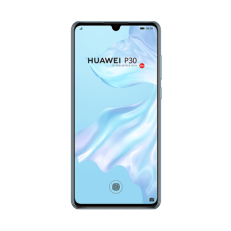

Huawei P30
$949.99


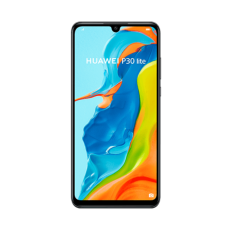

Huawei P30 lite
$479.99


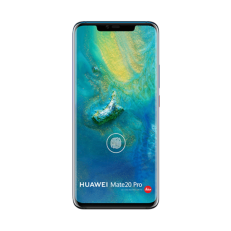

Huawei Mate 20 Pro
$1,299.99


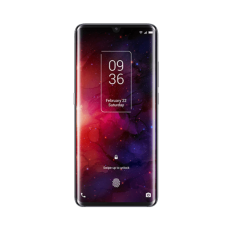

TCL 10 Pro
$700.00


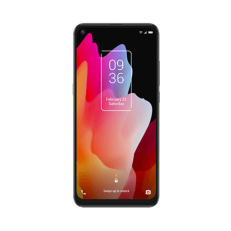

TCL 10L
$350.00


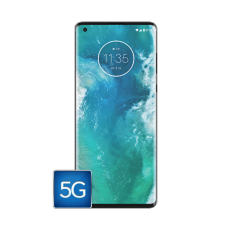

Motorola Edge<sup>+</sup>
$2,000.00


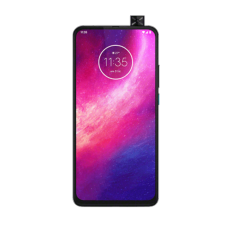

Motorola One Hyper
$650.00


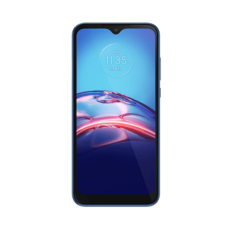

Moto E
$170.00


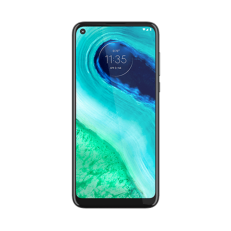

Moto G Fast
$300.00


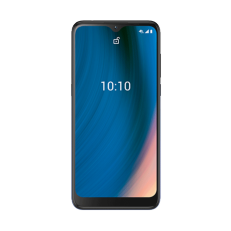

Alcatel 1X
$180.00


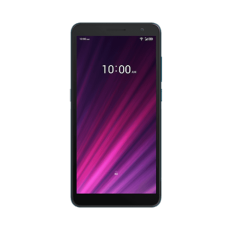

Alcatel 1B
$110.00


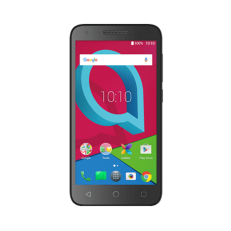

Alcatel U50™
$99.99


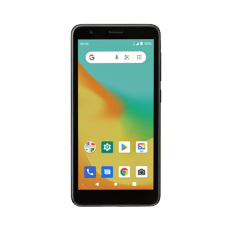

ZTE Blade A3 L
$79.00


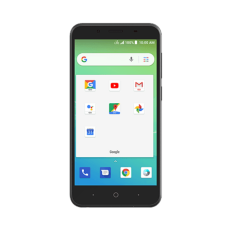

ZTE Z557
$89.99


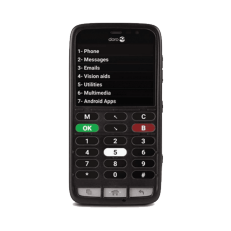

Doro 824C
$699.99



In [90]:
import requests
import bs4          

import matplotlib.pyplot as plt
import matplotlib.image as img 

from IPython.core.display import HTML
from tqdm.notebook import tqdm
import pandas as pd; tqdm.pandas() 

# BEAUTIFULSOUP/REQUEST LIBRARIES TO EXTRACT WHOLE HTML (SELENIUM NOT REQUIRED)
bell_url="https://www.bell.ca/Mobility/Smartphones_and_mobile_internet_devices"
soup = bs4.BeautifulSoup(requests.get(bell_url).text,"lxml")

# DICTIONARY COMPREHENSION, NESTED QUERY for picture/name (formerly dlist/glist)
dgdic={postpaid.get('alt') : "https://www.bell.ca/" + \
       str(postpaid.get('data-src')) for postpaid in soup \
       .select('.dl-tile-img') if 'Prepaid' not in str(postpaid) }

# PANDA DATAFRAME intead of loop to get price from BeautifulSoup        
plist = pd.DataFrame(soup.select(".dl-tile-full-price")) 

# Visualization with PYPLOT, TQDM, ENUMERATE, LAMBDA FUNCTION (5-8 sec)        
for j, summary in enumerate(tqdm(plist[1]
      .apply(lambda x: x.text.strip('\r\n ')))):
    im=img.imread(list(dgdic.values())[j])
    plt.imshow(im)
    plt.axis('off')
    plt.show()        
    print(list(dgdic.keys())[j])
    print(summary)

# Visualization with HTTP, TQDM, LAMBDA FUNCTION, PANDA (less than a sec)
def path_to_image_html(y): 
  return '<img src="'+ y + '" width="200" >'
summary = pd.DataFrame({'Phone':list(dgdic.keys()), \
  'Price':list(plist[1].progress_apply(lambda x: x .text.strip('\r\n '))), \
  'Picture':list(dgdic.values())})
HTML(summary.to_html(escape=False ,              \
  formatters=dict(Picture=path_to_image_html))) 